In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
## Para crear una clase con objetos relacionados

class Particle():
    
    def __init__(self, x0, v0, a0, t, m, radio, Id):   #Se trata del constructor de clase ''cómo construir el objeto''
                                                        #Siempre lleva el self porque hace referencia al objeto en creación
        self.dt = t[1] - t[0] #Paso del tiempo, es siempre constante
        self.r = x0     #Inicializar atributos
        self.v = v0  
        self.a = a0  
        
        self.rVector = np.zeros( (len(t),len(x0)) )    #Inicializar una matriz
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radio = radio
        self.Id = Id
        
    def Evolution(self):         #Ya es un método de la clase, con el self toma todo lo relacionado con el objeto
        
        #Ecuaciones diferenciales según método de Euler
        
        self.r += self.dt*self.v     
        self.v += self.dt*self.a
        
    def setPosition(self, i, r):
        
        self.rVector[i] = r
        
    def setVelocity(self, i, v):
        self.vVector[i] = v

In [3]:
#Discretización - Siempre existe ya que no se puede resolver de manera continua o exacta

dt = 0.01
tmax = 40
t = np.arange(0, tmax + dt, dt) #como un linspace pero en arrays

In [4]:
## Para crear un objeto

x0 = np.array([0.])     #Propiedades del objeto
v0 = np.array([20.])
a0 = np.array([2.])

p = Particle(x0, v0, a0, t, 1, 1, 1) #Aquí es cuando se crea la partícula

x0 = np.array([0.])

p1 = Particle(x0, v0, a0, t, 1, 1, 1) # Aquí se crea la segunda partícula

print(p, p1) #Brinda la información ''se creó un objeto que pertenece a la clase partícula y el lugar de la memoria dónde está. 
                #Van a tener direcciones distintas, permite modificar las propiedades de una sin modificar las demás

<__main__.Particle object at 0x000001587ACC2040> <__main__.Particle object at 0x000001587AD9C520>


In [5]:
## Para llamar atributos 

p1.v #Solicita la velocidad, se llama no como lo que pide el constructor sino como se declara con self.bla
        #. es un direccionador, por eso se usa para llamar atributos

array([20.])

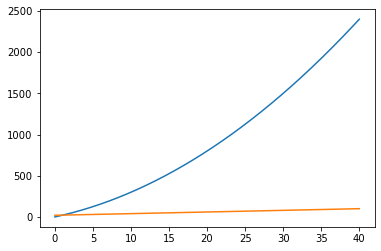

In [6]:
##Uso de un servicio (usar método de evolución)

p.Evolution()   

for i in range(len(t)): #guarda las posiciones en la evolución
    
    p.setPosition(i,p.r)
    p.setVelocity(i,p.v)
    p.Evolution()
    
plt.plot(t,p.rVector) #Grafica la evolución temporal de r y v
plt.plot(t,p.vVector)

In [32]:
#Para crear varios objetos en proceso de simulación
#Esto si ya es una función, no un método ni servicio

def GetParticles(NParticles, Limit, Velo, Dim = 2, dt = 0.1):      #Genera las partículas
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform(-Limit+1.0, Limit-1.0, size=Dim) #genera posiciones aleatorias de la dimensión especificada
        v0 = np.random.uniform(-Velo, Velo, size=Dim) #x0 Tienen una tolerancia que en realidad debería ser el radio de la partícula
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.,i)
        
        Particles_.append(p)
        
    return Particles_     

In [37]:
limits = np.array([20.,20.])
Particles = GetParticles(40,limits[0],5,dt=dt)

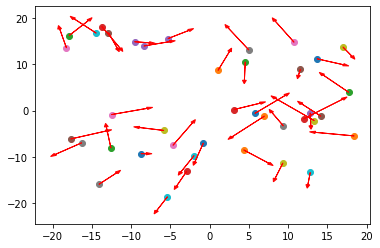

In [40]:
for p in Particles: 
    
    plt.scatter(p.r[0],p.r[1])
    plt.arrow(p.r[0],p.r[1],p.v[0],p.v[1], color='r',head_width=0.5)
    